In [2]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**Base de Datos CIFAR-10**

La base de datos CIFAR-10 es un conjunto de datos ampliamente utilizado en el campo de la visión por computadora y el aprendizaje automático. CIFAR significa "Canadian Institute For Advanced Research," ya que fue desarrollada por investigadores canadienses. Esta base de datos se utiliza para tareas de clasificación de imágenes y contiene lo siguiente:

1. **Clases:** CIFAR-10 consta de 10 clases diferentes, cada una representando un tipo de objeto o escena que se encuentra comúnmente en imágenes. Las clases son las siguientes:

   - Avión
   - Automóvil
   - Pájaro
   - Gato
   - Ciervo
   - Perro
   - Rana
   - Caballo
   - Barco
   - Camión

2. **Imágenes:** El conjunto de datos contiene un total de 60,000 imágenes a color, que se dividen en 50,000 imágenes de entrenamiento y 10,000 imágenes de prueba. Cada imagen tiene un tamaño de 32x32 píxeles.

3. **Estructura de Carpetas:** En general, las imágenes se organizan en 10 carpetas diferentes (una para cada clase), y cada imagen se almacena en la carpeta correspondiente a su clase.

4. **Uso Común:** CIFAR-10 se utiliza comúnmente para la evaluación y el desarrollo de algoritmos de clasificación de imágenes y redes neuronales convolucionales (CNN). Es un conjunto de datos desafiante debido al tamaño pequeño de las imágenes y a la variabilidad de las clases.

5. **Objetivo:** El objetivo principal de CIFAR-10 es entrenar modelos de aprendizaje automático para que puedan clasificar correctamente las imágenes en una de las 10 clases.

CIFAR-10 es un conjunto de datos estándar que se ha convertido en una referencia para la evaluación de algoritmos de visión por computadora y aprendizaje profundo. Su versión más grande, llamada CIFAR-100, contiene 100 clases en lugar de 10 y es utilizada para tareas de clasificación más desafiantes. Estos conjuntos de datos se utilizan comúnmente en competencias y proyectos relacionados con la visión por computadora.


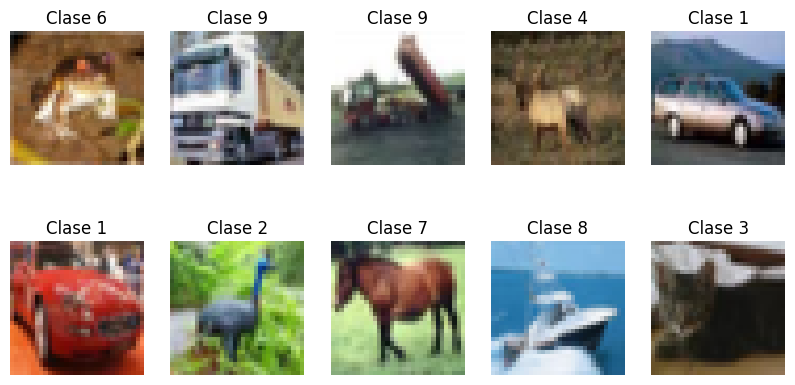

In [3]:
# Ejercicio 1: Cargar y explorar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Mostrar algunas imágenes y sus etiquetas
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Clase {y_train[i][0]}")
    plt.axis('off')
plt.show()

In [4]:
# Ejercicio 2: Preprocesamiento de datos
# Normalización de imágenes
x_train = x_train / 255.0
x_test = x_test / 255.0

# Codificación one-hot de etiquetas
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Ejercicio 3: Construir y entrenar una CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [5]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 61s 48ms/step - loss: 1.5616 - accuracy: 0.4259 - val_loss: 1.2956 - val_accuracy: 0.5326
Epoch 2/10
1250/1250 [==============================] - 57s 46ms/step - loss: 1.2005 - accuracy: 0.5720 - val_loss: 1.1261 - val_accuracy: 0.6011
Epoch 3/10
1250/1250 [==============================] - 57s 45ms/step - loss: 1.0536 - accuracy: 0.6295 - val_loss: 1.0545 - val_accuracy: 0.6292
Epoch 4/10
1250/1250 [==============================] - 57s 45ms/step - loss: 0.9564 - accuracy: 0.6636 - val_loss: 1.0068 - val_accuracy: 0.6485
Epoch 5/10
1250/1250 [==============================] - 55s 44ms/step - loss: 0.8868 - accuracy: 0.6869 - val_loss: 0.9464 - val_accuracy: 0.6693
Epoch 6/10
1250/1250 [==============================] - 55s 44ms/step - loss: 0.8228 - accuracy: 0.7109 - val_loss: 0.9286 - val_accuracy: 0.6793
Epoch 7/10
1250/1250 [==============================] - 57s 46ms/step - loss: 0.7643 - accuracy: 0.7319 - val_loss: 0.9052 -

In [6]:
# Evaluar el rendimiento del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

313/313 [==============================] - 6s 19ms/step - loss: 0.9373 - accuracy: 0.6869
Pérdida en el conjunto de prueba: 0.9372748136520386
Precisión en el conjunto de prueba: 0.6869000196456909


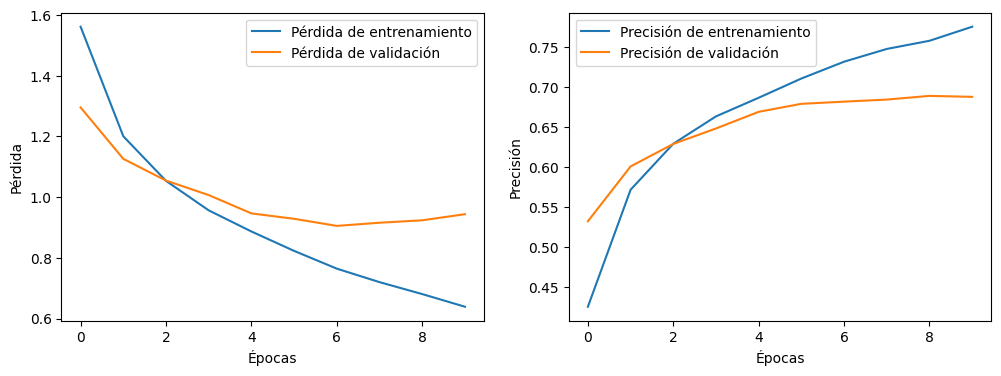

In [7]:
# Visualizar las curvas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()